<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_6_resz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Homográfia

A homográfia egy matematikai transzformáció, amely sík képek közötti geometriai kapcsolatot ír le.


A homográfia hasznos lehet például az alábbi esetekben:

Kép regisztráció: Két kép közötti geometriai kapcsolatok meghatározására, például amikor az egyik képen ugyanaz a tárgy látható egy másik perspektívából vagy eltolódva.

Panoráma összeállítás: Képek egy sorozatának összeállításához, hogy létrehozzunk egy nagyobb látószögű vagy panorámaképet.

Perspektíva korrekció: A perspektíva torzítás javítására például olyan esetekben, amikor a kamera nem vízszintes vagy nem merőleges az objektumokra.

Objektum követés: Az objektumok mozgásának követéséhez a képeken.


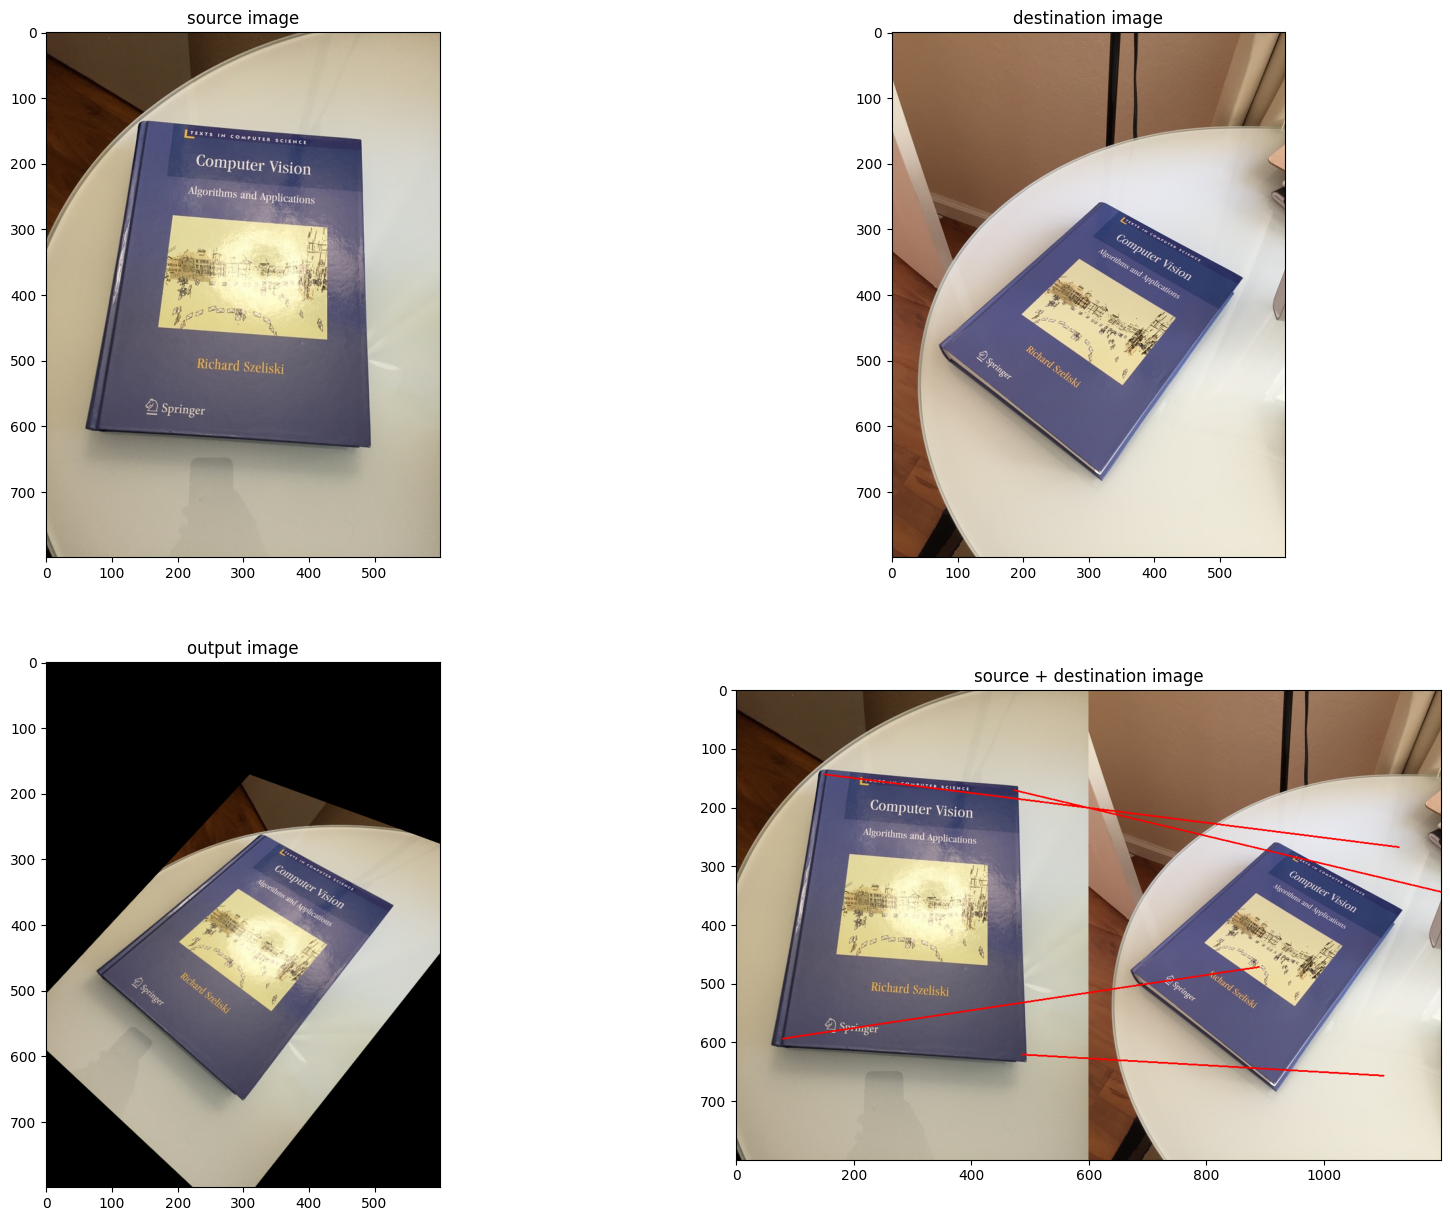

In [61]:
# A random modulból importáljuk a randint függvényt, amelyet a vonalak színének véletlenszerű beállításához használunk.
from random import randint

# Bemeneti kép beolvasása színes képként.
im_src = cv.imread('/content/drive/MyDrive/opencv/images/book2.jpg', cv.IMREAD_COLOR)

# A forrás kép négy sarka, amelyeket a 'pts_src' változóban tárolunk.
pts_src = np.array([[149, 143], [473, 170], [487, 620], [79, 593]])

# Célnak szolgáló kép beolvasása, színes képként.
im_dst = cv.imread('/content/drive/MyDrive/opencv/images/book1.jpg', cv.IMREAD_COLOR)


# A célnak szolgáló kép négy sarka, amelyeket a 'pts_dst' változóban tárolunk.
pts_dst = np.array([[328, 267], [521, 372], [302, 656], [90, 471]])

# Homográfia számítása a forrás és cél sarkok között a 'cv.findHomography' függvénnyel.
h, status = cv.findHomography(pts_src, pts_dst)

# A forrás kép átmásolása a cél képre a homográfia alapján a 'cv.warpPerspective' függvénnyel.
im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))

# Homográfia által átalakított forrás sarkok koordinátáinak kiszámítása és vonalak rajzolása az ábrázoláshoz.
img_draw_matches = cv.hconcat([im_src, im_dst])

color = (0, 0, 255)  # Piros szín (B, G, R formátumban)
thickness = 2

img_draw_matches = cv.hconcat([im_src, im_dst])
for i in range(len(pts_src)):
  p1 = (pts_src[i][0], pts_src[i][1])
  p2 = (pts_dst[i][0] + im_src.shape[0], pts_dst[i][1])
  cv.line(img_draw_matches, p1, p2, color, thickness)

# Képek megjelenítése a matplotlib segítségével négy alárendelt ábrán.
f, axs = plt.subplots(2, 2, figsize=(20, 15))
plt.subplot(221), plt.imshow(cv.cvtColor(im_src, cv.COLOR_BGR2RGB)), plt.title('source image')
plt.subplot(222), plt.imshow(cv.cvtColor(im_dst, cv.COLOR_BGR2RGB)), plt.title('destination image')
plt.subplot(223), plt.imshow(cv.cvtColor(im_out, cv.COLOR_BGR2RGB)), plt.title('output image')
plt.subplot(224), plt.imshow(cv.cvtColor(img_draw_matches, cv.COLOR_BGR2RGB)), plt.title('source + destination image')
plt.show()